# Notebook to analyze latent space of UKBioBank, when trained with all subjects of UKBioBank

In [2]:
import umap
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

/volatile/jc225751/Runs/61_classifier_regresser/Program/venv_natif/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/volatile/jc225751/Runs/61_classifier_regresser/Program/venv_natif/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/volatil

In [3]:
labels = pd.read_csv("/neurospin/dico/data/deep_folding/current/datasets/UkBioBank/participants_sex_age.csv")

In [4]:
labels.head()

participant_id  Sex   Age
0    sub-3411469    1  65.0
1    sub-2290292    0  69.0
2    sub-3842391    0  70.0
3    sub-2758537    1  49.0
4    sub-4334619    1  70.0

In [5]:
# test model
test_model = "/volatile/jc225751/Runs/59_analysis_ukbiobank/Output/trained_on_ukbiobank/chosen_model/chosen_model"
# test_model = "/neurospin/dico/data/deep_folding/papers/ipmi2023/models/beta-VAE/n_10/#2"
dataset_train = 'cing_UKB'

# load the data
train_df = pd.read_csv(test_model+'/'+dataset_train+'_embeddings/train_val_embeddings.csv', index_col=0)
train_df.sort_index(inplace=True)
len(train_df)

21070

In [6]:
dataset_test = 'cing_UKB'

test_df = pd.read_csv(test_model+'/'+dataset_test+'_embeddings/cross_val_effective_embeddings.csv', index_col=0)
test_df.sort_index(inplace=True)


In [7]:
print(len(test_df))
test_df.head()

21070


dim1       dim2       dim3       dim4      dim5       dim6   
ID                                                                             
sub-1000021 -11.076596  -0.057595  -0.504944  13.787151 -5.623169 -14.787988  \
sub-1000458   9.511126   0.128145   4.478192   3.851682  7.315600   7.109015   
sub-1000575 -17.447620  -4.579595 -10.238688  14.008759  5.279232  -0.996238   
sub-1000606   0.840572  15.780233  -9.238464  -0.624598 -5.837039 -27.161880   
sub-1000963  -8.784658   1.427980  -2.758446  -6.381389 -0.388595  13.868286   

                  dim7       dim8       dim9      dim10  
ID                                                       
sub-1000021  -6.232752  15.323558  10.418934 -11.061040  
sub-1000458 -11.019068  -1.318155   1.013750  -4.718797  
sub-1000575   9.278101   0.155234   0.313623  15.755117  
sub-1000606  12.402494   8.603504  13.773625  -3.677514  
sub-1000963 -14.848120   3.806090   4.268199   5.453033

In [8]:
dataset_second = 'cingulate_ACCpatterns'
second_df = pd.read_csv(test_model+'/'+dataset_second+'_embeddings/cross_val_effective_embeddings.csv', index_col=0)
second_df.sort_index(inplace=True)


# load the labels
prediction_df = pd.read_csv(test_model+'/'+dataset_second+'_embeddings/cross_val_predicted_labels.csv', index_col=0)
prediction_df.sort_index(inplace=True)
len(prediction_df)

341

In [9]:
dataset_third = 'cingulate_HCP_full_gender'
third_df = pd.read_csv(test_model+'/'+dataset_third+'_embeddings/cross_val_effective_embeddings.csv', index_col=0)
third_df.sort_index(inplace=True)

In [10]:
prediction_df.head()

label     svm_0     svm_1     svm_2     svm_3     svm_4   
Subject                                                                 
1-03HUBJO_t0      1  0.792465  0.784215  0.793623  0.784570  0.819344  \
1-08ANDTI_t0      1  0.246454  0.264815  0.252589  0.261357  0.255166   
1-11LEBJO_t0      1  0.194381  0.212955  0.200071  0.209572  0.199256   
1-15LEHMI_t0      0  0.745649  0.739201  0.747505  0.739192  0.774505   
1-17COLMA_t0      0  0.179228  0.197646  0.184734  0.194319  0.183047   

                 svm_5     svm_6     svm_7     svm_8  ...   svm_243   svm_244   
Subject                                               ...                       
1-03HUBJO_t0  0.822166  0.762999  0.777797  0.769743  ...  0.725859  0.825874  \
1-08ANDTI_t0  0.251240  0.288211  0.255614  0.272151  ...  0.296794  0.263412   
1-11LEBJO_t0  0.195186  0.238535  0.204846  0.221854  ...  0.251633  0.206160   
1-15LEHMI_t0  0.777090  0.720365  0.731689  0.725382  ...  0.684882  0.782183   
1-17COLMA_t0  0.178996  0.223580  0.189915  0.206877  ...  0.237851  0.189511   

               svm_245   svm_246   svm_247   svm_248   svm_249  median_pred   
Subject                                                                       
1-03HUBJO_t0  0.731402  0.780195  0.793195  0.763955  0.813311     0.771330  \
1-08ANDTI_t0  0.282334  0.253301  0.279997  0.270343  0.238273     0.266013   
1-11LEBJO_t0  0.236422  0.202345  0.226571  0.220773  0.184198     0.215011   
1-15LEHMI_t0  0.688638  0.733865  0.749907  0.719392  0.766432     0.725746   
1-17COLMA_t0  0.222534  0.187392  0.210699  0.206004  0.168667     0.200021   

              mean_pred  average_model  
Subject                                 
1-03HUBJO_t0   0.770732       0.753232  
1-08ANDTI_t0   0.265820       0.282183  
1-11LEBJO_t0   0.215689       0.233731  
1-15LEHMI_t0   0.726112       0.710038  
1-17COLMA_t0   0.200857       0.219155  

[5 rows x 254 columns]

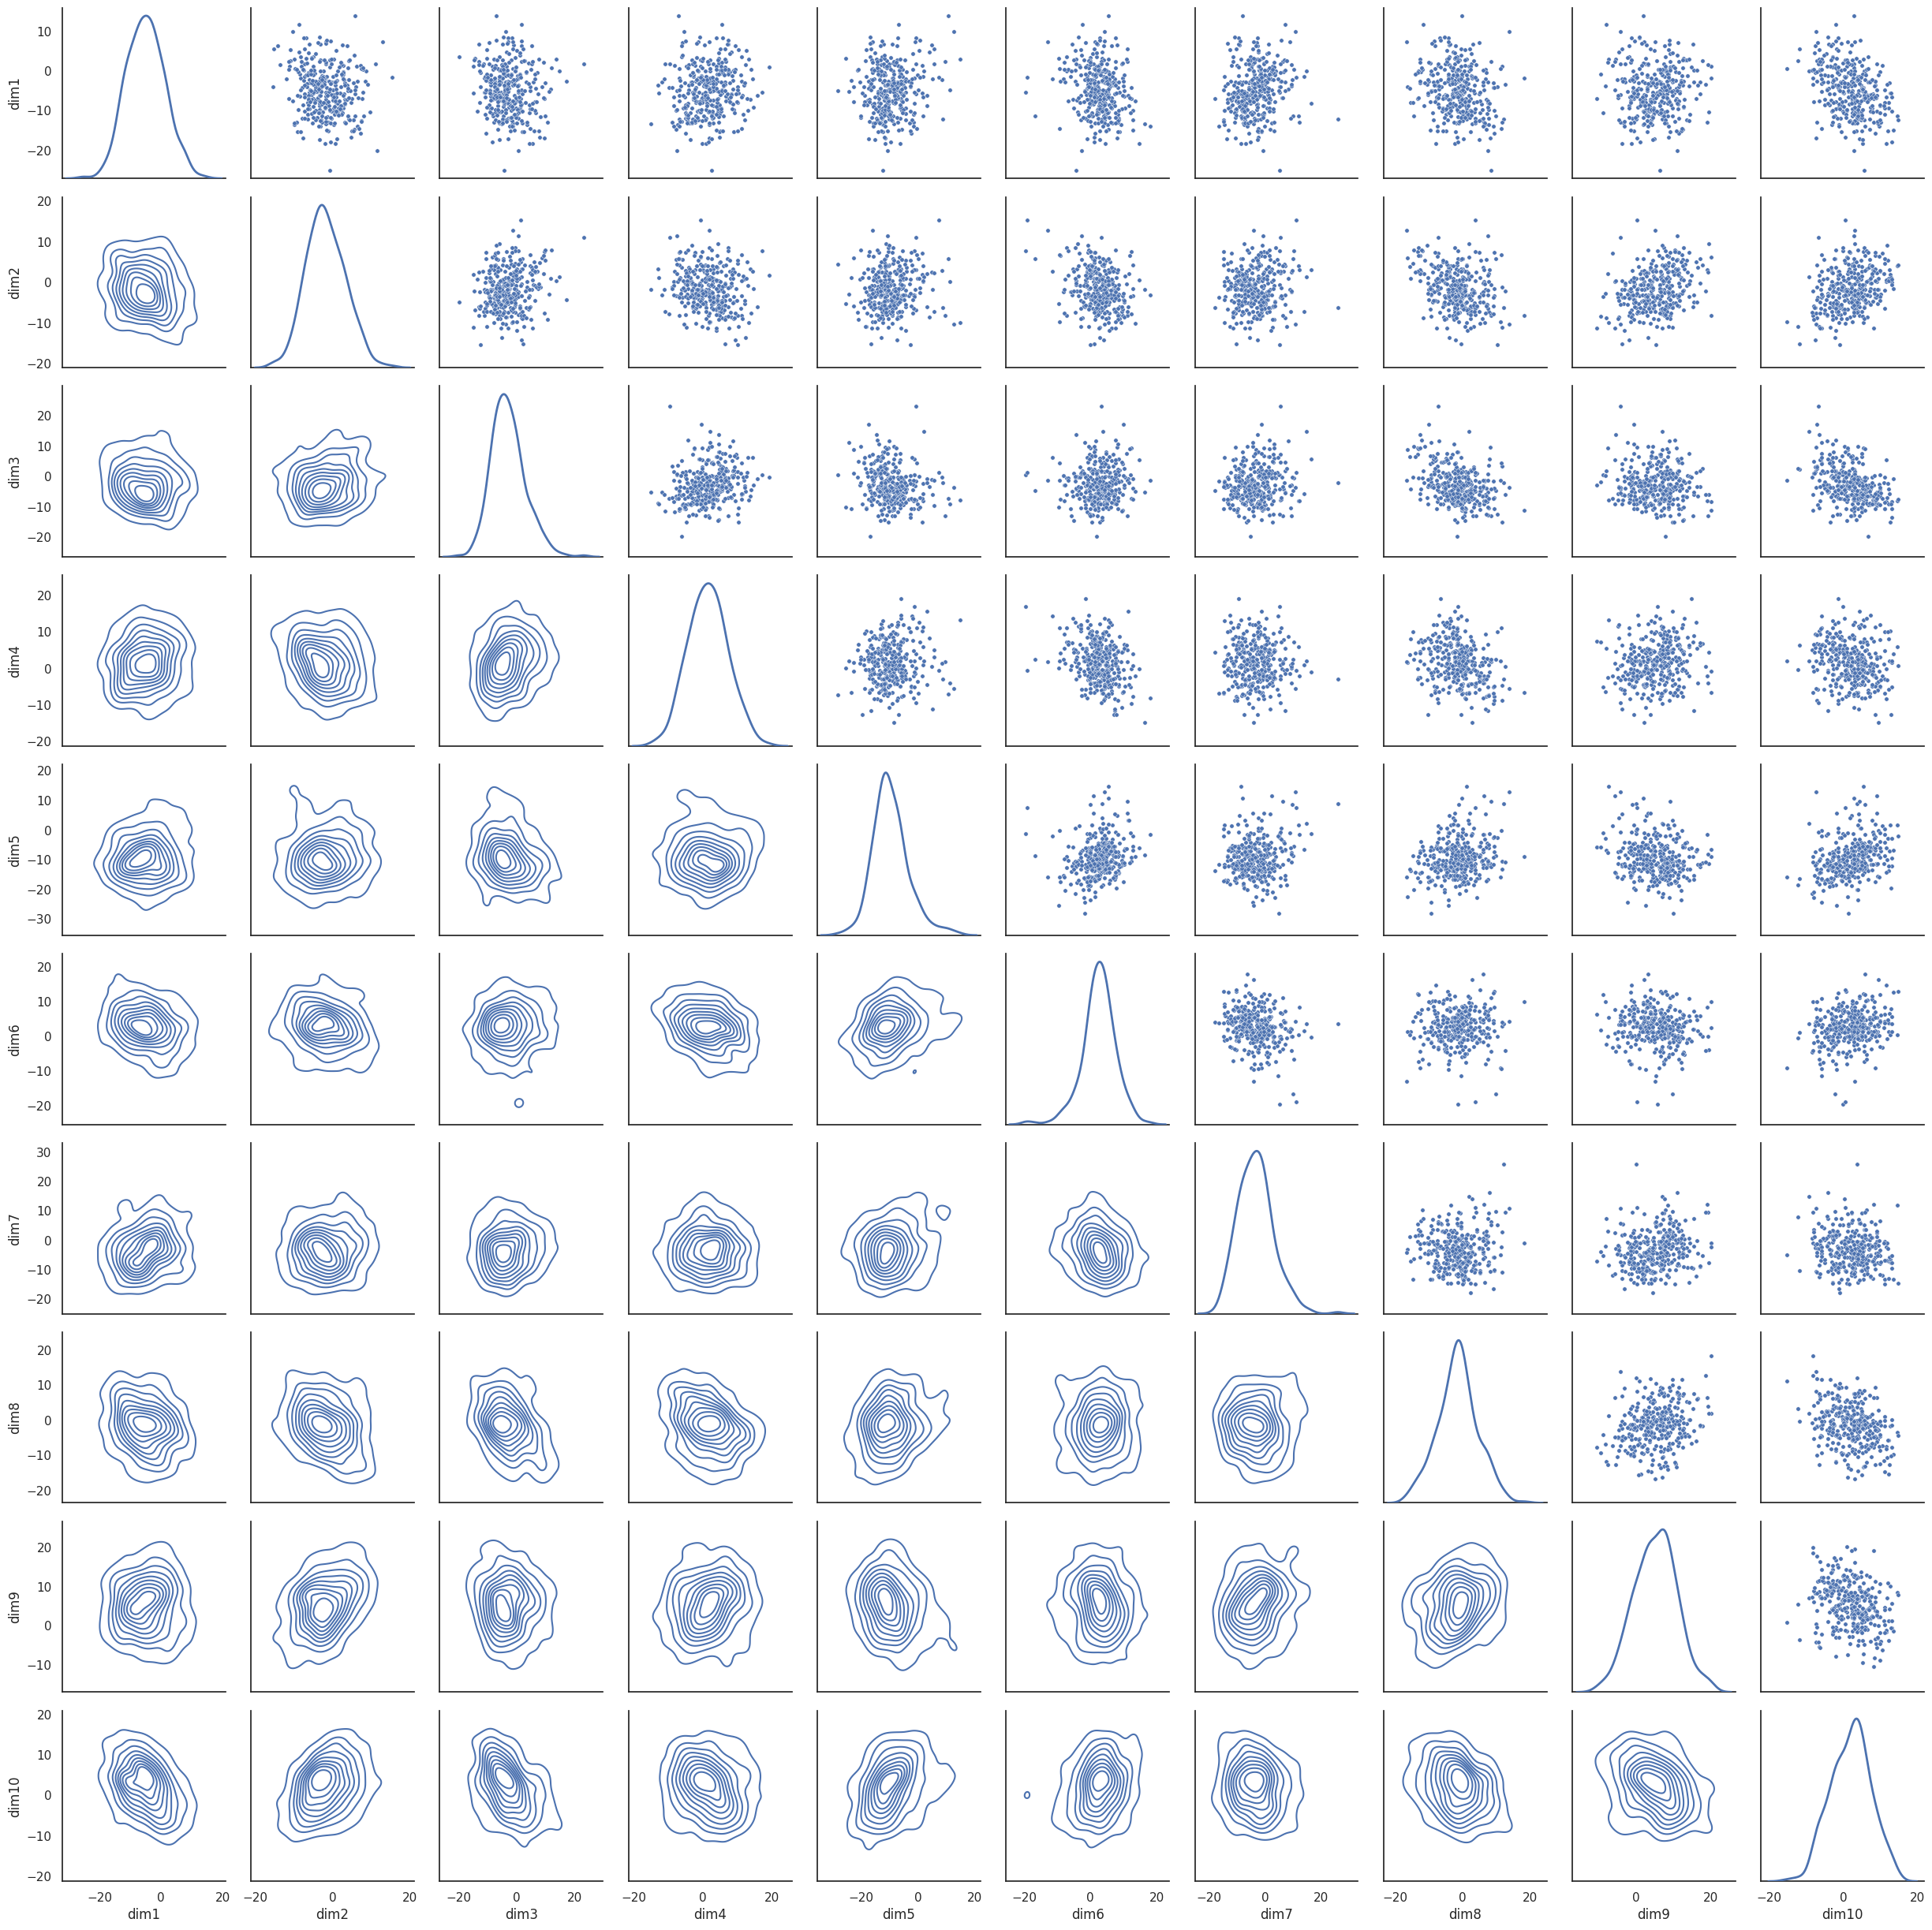

In [11]:
sns.set_theme(style="white")

g = sns.PairGrid(second_df, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

# Order labels according to test_df

In [12]:
test_df.head

<bound method NDFrame.head of                   dim1       dim2       dim3       dim4       dim5       dim6   
ID                                                                              
sub-1000021 -11.076596  -0.057595  -0.504944  13.787151  -5.623169 -14.787988  \
sub-1000458   9.511126   0.128145   4.478192   3.851682   7.315600   7.109015   
sub-1000575 -17.447620  -4.579595 -10.238688  14.008759   5.279232  -0.996238   
sub-1000606   0.840572  15.780233  -9.238464  -0.624598  -5.837039 -27.161880   
sub-1000963  -8.784658   1.427980  -2.758446  -6.381389  -0.388595  13.868286   
...                ...        ...        ...        ...        ...        ...   
sub-6023469 -11.952407   5.841232  16.404675  11.095070   1.556912   7.268332   
sub-6023808 -13.895431  -8.530109  11.757917   7.843577  -9.248485  -5.962759   
sub-6023847 -11.215756  -7.821204  -2.024203  11.964317  -1.616784 -10.620109   
sub-6024038   0.055345   3.329187   6.477418   1.100934  -4.454317  14.934581  

In [13]:
labels.head()

participant_id  Sex   Age
0    sub-3411469    1  65.0
1    sub-2290292    0  69.0
2    sub-3842391    0  70.0
3    sub-2758537    1  49.0
4    sub-4334619    1  70.0

In [14]:
test_df.index

Index(['sub-1000021', 'sub-1000458', 'sub-1000575', 'sub-1000606',
       'sub-1000963', 'sub-1001428', 'sub-1001444', 'sub-1002188',
       'sub-1002584', 'sub-1002622',
       ...
       'sub-6021771', 'sub-6021833', 'sub-6021898', 'sub-6022058',
       'sub-6022449', 'sub-6023469', 'sub-6023808', 'sub-6023847',
       'sub-6024038', 'sub-6024754'],
      dtype='object', name='ID', length=21070)

In [15]:
labels = labels[labels["participant_id"].isin(test_df.index)].sort_values("participant_id")

In [16]:
test_df[~test_df.index.isin(labels["participant_id"])]

dim1       dim2       dim3       dim4       dim5       dim6   
ID                                                                              
sub-1244534 -17.131405   6.313242  -1.996070 -11.201558 -11.323994  -6.127464  \
sub-2021210  -5.996674   9.147147  -2.676048 -12.138654  -0.263746  -0.334973   
sub-3763346   1.643122  -5.643748  -2.215579  -3.261813   7.758524   9.370661   
sub-5474299   4.487293   0.917712  13.072401   1.354471  -6.351562  -1.410625   
sub-5474869   6.593253  10.406571  -7.336522  -9.528376   5.558771 -11.324166   
sub-5885587  -3.557790  18.119528  -0.437258  -2.806751  12.492982 -20.034980   

                  dim7      dim8       dim9     dim10  
ID                                                     
sub-1244534  16.298988  4.442648   2.232964  6.402732  
sub-2021210 -10.774551  9.487699   2.218191  0.355893  
sub-3763346  -0.899666 -4.730937 -12.814708  8.142083  
sub-5474299   6.316897 -4.819544   0.303291 -8.838505  
sub-5474869  -5.428445 -6.460290 -15.552969  9.855371  
sub-5885587   0.866417  2.004073  -9.876721  6.394010

In [17]:
test_df = test_df.drop(index=['sub-1244534', 'sub-2021210', 'sub-3763346', 'sub-5474299', 'sub-5474869', 'sub-5885587'])

## Visualize umap

In [18]:
def display_umaps_true_labels(visual_embs_train, reducer, test_df, prediction_df, verbose=False):
    if verbose:
        print("Test df:")
        print(test_df[:5])
        print("Prediction df:")
        print(prediction_df[:5])

    # apply umap
    if verbose:
        print("UMAP embeddings")
        print(visual_embs_train.shape)
        print(visual_embs_train[:5])
    visual_embs_test = reducer.transform(test_df)

    ## plot the graphs

    # plt.figure()
    # plt.scatter(visual_embs_train[:,0], visual_embs_train[:,1], c='green', alpha=0.4)

    # plot for true labels/volatile/jc225751/Runs/59_analysis_ukbiobank/Output/
    cmap = ['b', 'r']
    colors = [cmap[i] for i in prediction_df.label]

    plt.scatter(visual_embs_train[:,0], visual_embs_train[:,1], c=colors, s=1, alpha=0.6)
    plt.title("True labels")
    plt.show()
    
    plt.show()

    return pd.DataFrame(visual_embs_test, index=test_df.index.values)

In [19]:
def compute_umap(df, n_neighbors=15):
    # apply umap
    reducer = umap.UMAP(n_neighbors=n_neighbors)
    visual_embs = reducer.fit_transform(df)
    return visual_embs, reducer

In [20]:
len(third_df)

1113

# UMAP on UKBioBank

In [21]:
visual_embs, reducer = compute_umap(test_df, n_neighbors=100)

In [22]:
ukbiobank_embs = visual_embs.copy()

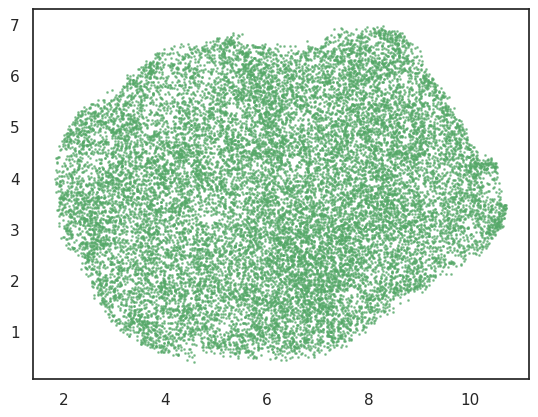

In [23]:
plt.scatter(ukbiobank_embs[:,0], ukbiobank_embs[:,1], c='g', s=1, alpha=0.6)

In [25]:
#sns.heatmap(ukbiobank_embs, annot=True, fmt='g')

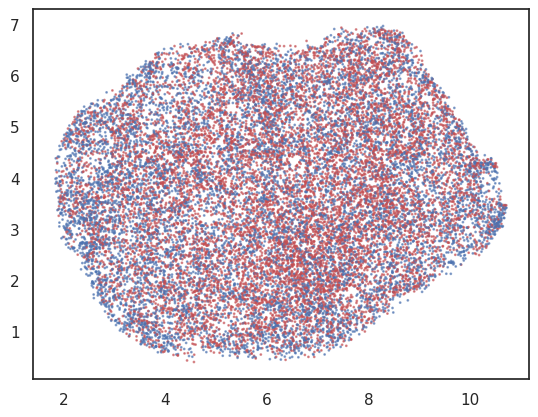

In [26]:
cmap = ['r', 'b']
colors = [cmap[i] for i in labels.Sex]
plt.scatter(ukbiobank_embs[:,0], ukbiobank_embs[:,1], c=colors, s=1, alpha=0.6)

In [53]:
norm_age = (labels.Age-50)/labels.Age.std()*100
# plot for true labels
cmap = ['green', 'r']
alpha_ref = [0,1]
colors = [cmap[age>0] for age in norm_age]
alphas = [alpha_ref[age<0] for age in norm_age]

In [54]:
(norm_age<0).sum()

828

In [55]:
colors

['r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'green',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'green',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'green',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r'

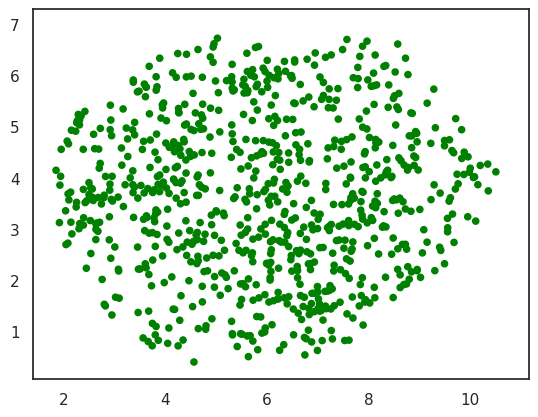

In [56]:
plt.scatter(ukbiobank_embs[:,0], ukbiobank_embs[:,1], c=colors, s=20, alpha=alphas)

In [34]:
ukbiobank_embs

array([[2.725241 , 2.7731202],
       [8.028211 , 3.2418497],
       [5.4122934, 5.631881 ],
       ...,
       [3.234915 , 2.8890636],
       [7.2399983, 1.559334 ],
       [8.413648 , 3.726072 ]], dtype=float32)

In [30]:
second_embs = reducer.transform(second_df)

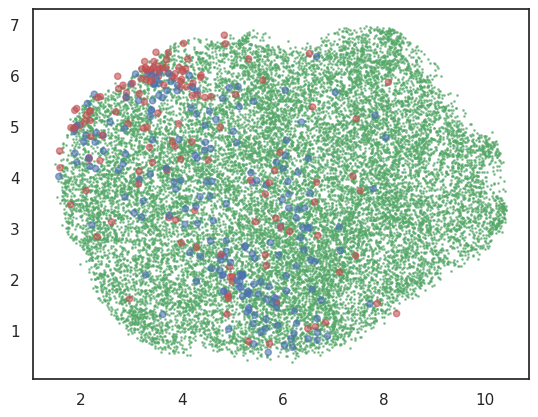

In [31]:
# plot for true labels
cmap = ['b', 'r']
colors = [cmap[i] for i in prediction_df.label]

plt.scatter(visual_embs[:,0], visual_embs[:,1], c='g', s=1, alpha=0.6)
plt.scatter(second_embs[:,0], second_embs[:,1], c=colors, s=20, alpha=0.6)

In [32]:
third_embs = reducer.transform(third_df)

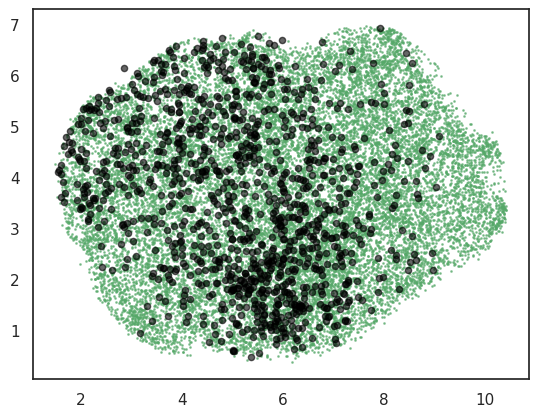

In [33]:
plt.scatter(visual_embs[:,0], visual_embs[:,1], c='g', s=1, alpha=0.6)
plt.scatter(third_embs[:,0], third_embs[:,1], c='black', s=20, alpha=0.6)

# UMAP on ACCpatterns

In [34]:
visual_embs, reducer = compute_umap(second_df, n_neighbors=15)

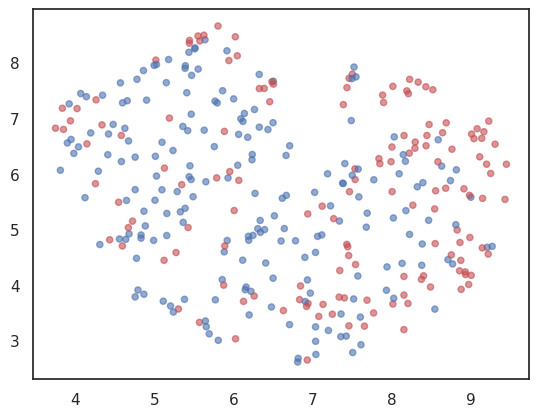

In [35]:
cmap = ['b', 'r']
colors = [cmap[i] for i in prediction_df.label]
plt.scatter(visual_embs[:,0], visual_embs[:,1], c=colors, s=20, alpha=0.6)

In [36]:
test_embs = reducer.transform(test_df)

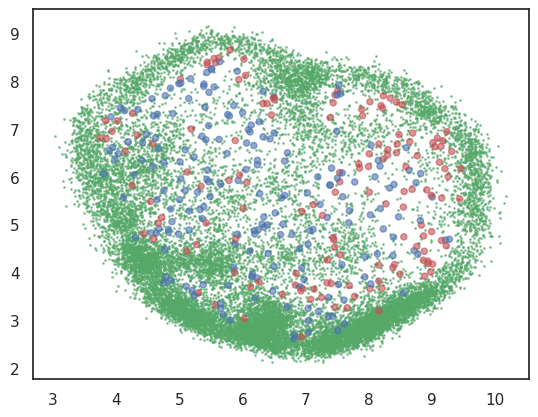

In [37]:
cmap = ['b', 'r']
colors = [cmap[i] for i in prediction_df.label]
plt.scatter(test_embs[:,0], test_embs[:,1], c='g', s=1, alpha=0.6)
plt.scatter(visual_embs[:,0], visual_embs[:,1], c=colors, s=20, alpha=0.6)

# UMAP on HCP

In [38]:
visual_embs, reducer = compute_umap(third_df, n_neighbors=15)

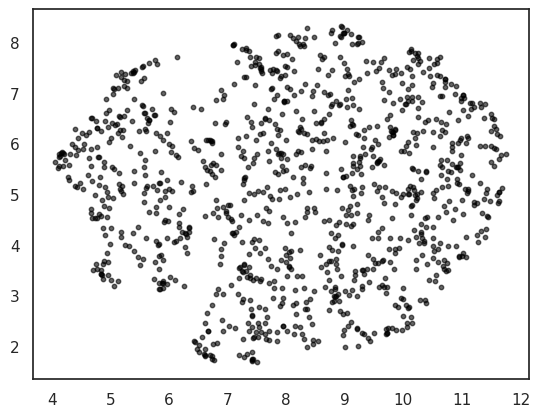

In [39]:
plt.scatter(visual_embs[:,0], visual_embs[:,1], c='black', s=10, alpha=0.6)

In [40]:
second_embs = reducer.transform(second_df)

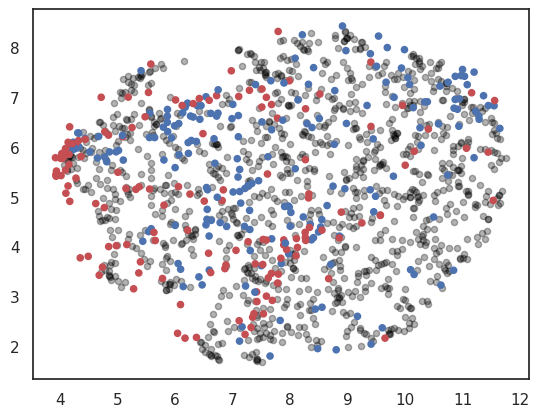

In [41]:
cmap = ['b', 'r']
colors = [cmap[i] for i in prediction_df.label]

plt.scatter(visual_embs[:,0], visual_embs[:,1], c='black', s=20, alpha=0.3)
plt.scatter(second_embs[:,0], second_embs[:,1], c=colors, s=20, alpha=1)

In [42]:
second_df.head()

dim1       dim2       dim3      dim4       dim5      dim6   
ID                                                                             
1-03HUBJO_t0  -5.754253   3.078586  -7.888584  0.087529  -0.789996  5.483637  \
1-08ANDTI_t0   1.088328 -11.042294 -14.992330 -4.669141 -10.526248  2.802538   
1-11LEBJO_t0  -1.836876  -8.145627 -11.142085 -6.752227  -8.926461  9.820431   
1-15LEHMI_t0 -11.456051   4.063096  -7.979030  5.857479   1.790742  0.411421   
1-17COLMA_t0  -0.297105   2.693733  -4.022460  7.794108  -3.994520  4.481436   

                   dim7       dim8       dim9      dim10  
ID                                                        
1-03HUBJO_t0 -13.182101  -0.121508   5.131477   8.060051  
1-08ANDTI_t0   2.753804  11.640773   9.842704  -3.447931  
1-11LEBJO_t0  -1.027278  18.260162  20.029728  -8.143515  
1-15LEHMI_t0  12.011239  -3.431442   8.380008  14.502483  
1-17COLMA_t0   6.465611 -12.552568  10.662281   9.809521

In [43]:
third_embs = reducer.transform(test_df)

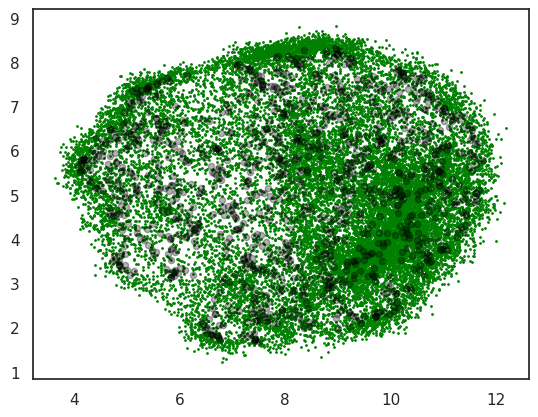

In [44]:
plt.scatter(third_embs[:,0], third_embs[:,1], c='green', s=1, alpha=1)
plt.scatter(visual_embs[:,0], visual_embs[:,1], c='black', s=20, alpha=0.3)

# Density map of UKBioBank

In [45]:
Z, xedges, yedges = np.histogram2d(ukbiobank_embs[:,0], ukbiobank_embs[:,1], bins=50, normed=True)

TypeError: histogram2d() got an unexpected keyword argument 'normed'

In [ ]:
plt.pcolormesh(xedges, yedges, Z.T)

NameError: name 'xedges' is not defined

In [ ]:
# fig, ax = plt.subplots(figsize=[15,8])
# plt.imshow(Z.T)

In [ ]:
Z = Z/np.unique(Z)[1]

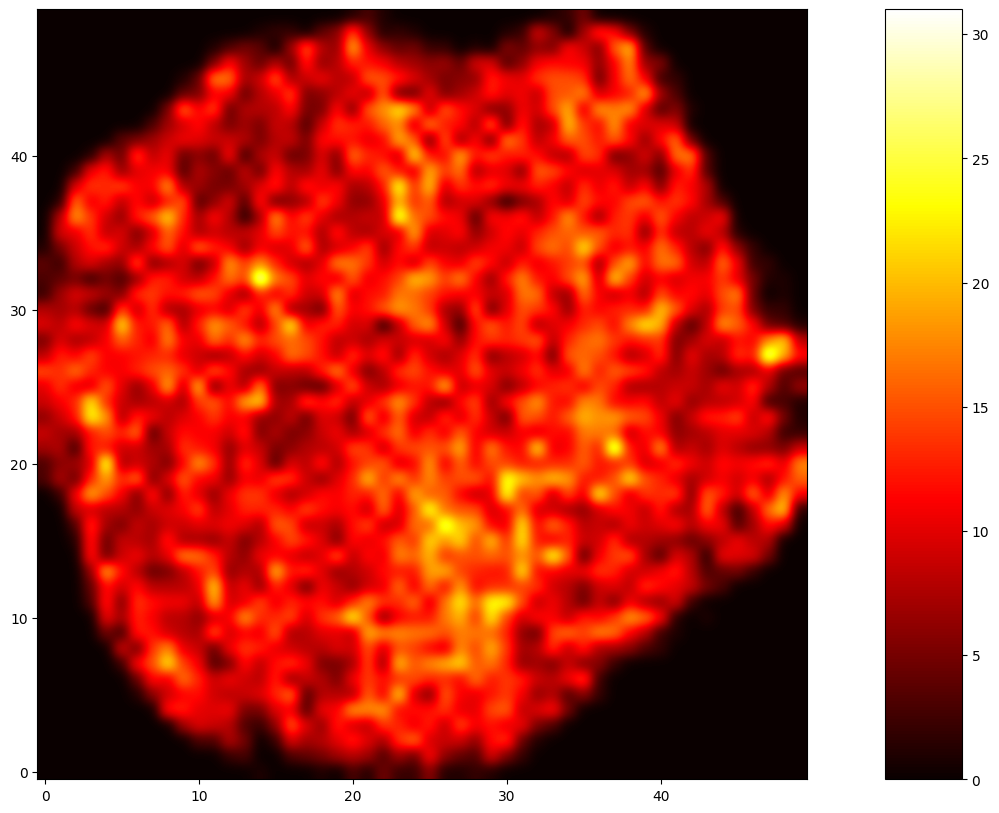

In [ ]:
fig, ax = plt.subplots(figsize=[20,10])
cax = ax.imshow(Z.T,
          origin='lower',
          cmap='hot', 
          interpolation='gaussian'
          )
cbar   = fig.colorbar(cax,aspect=10)

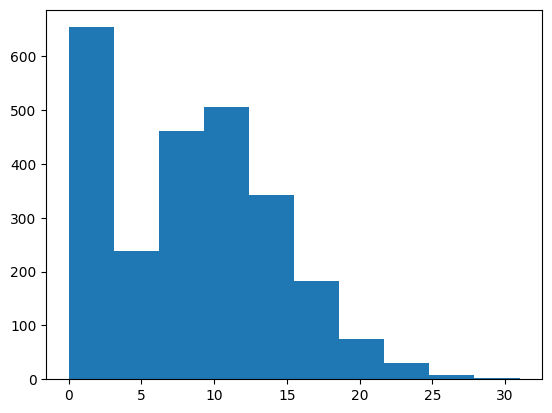

In [ ]:
h = plt.hist(Z.reshape(Z.size,1), bins=10)

In [ ]:
# import scipy.ndimage as ndi

In [ ]:
# img = ndi.gaussian_filter(Z, (1,1))
# f, axs = plt.subplots(1, 1, figsize=(15, 15))
# plt.imshow(img)